# **Project Name**    - Movie Recommendation System



##### **Contribution**    - Individual
##### **Team Member 1 - Parth Khera**

# **Project Summary -**

This project focuses on building a content-based movie recommendation system that suggests films similar to a given title based on their content features. The system does not rely on user preferences or ratings but instead uses information such as the plot summary, genres, cast, keywords, and director to identify similarities between movies.

The development process begins by selecting only the essential features required for content comparison. These include the movie title, overview, genres, keywords, top cast members, and director. These elements are cleaned and combined into a single text field called "features," which serves as the input for further analysis. The text data is pre-processed through several steps including lowercasing, removing unnecessary spaces, and applying stemming to reduce words to their root forms. This ensures that different forms of the same word are treated similarly.

To convert the textual data into a format that a machine learning model can understand, the system uses TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This technique transforms the text into numerical vectors that reflect the importance of each term relative to other movies. Cosine similarity is then used to measure how close two movies are in terms of content, based on the angle between their corresponding vectors.

The system includes a function that, when provided with a movie title, returns a list of the most similar movies. While this model effectively finds content-related recommendations, it does not account for individual user preferences. Future enhancements could involve integrating collaborative filtering to create more personalized suggestions.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core problem is to effectively recommend movies to users based on the characteristics of the movies themselves. In the vast landscape of digital entertainment, users often face decision fatigue when choosing what to watch next. A recommendation system aims to alleviate this by suggesting relevant content.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/Copy of Copy of movies.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(4803, 24)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


<Axes: >

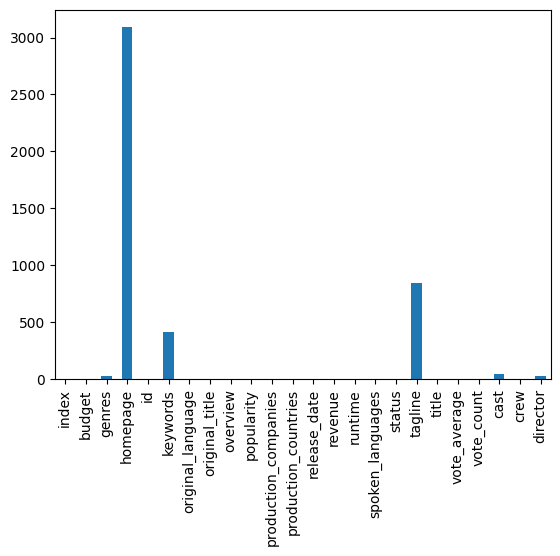

In [ ]:
# Visualizing the missing values
data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Variables Description

| **Column**             | **Explanation**                                                                                        |
| ---------------------- | ------------------------------------------------------------------------------------------------------ |
| `index`                | Row index; may be redundant if this is just a default DataFrame index.                                 |
| `budget`               | Budget of the movie (usually in USD).                                                                  |
| `genres`               | Genres of the movie (e.g., Action, Comedy); typically stored as a stringified list or dictionary.      |
| `homepage`             | URL of the official homepage of the movie (if available).                                              |
| `id`                   | Unique identifier for the movie (from the original source).                                            |
| `keywords`             | List of keywords or tags describing the movie's themes or subjects.                                    |
| `original_language`    | Language in which the movie was originally produced (e.g., 'en' for English).                          |
| `original_title`       | The movie’s original title (could be in a different language than `title`).                            |
| `overview`             | A brief description or summary of the movie’s plot.                                                    |
| `popularity`           | Popularity score (often based on views, clicks, or other metrics).                                     |
| `production_companies` | List of production companies involved in making the film.                                              |
| `production_countries` | List of countries where the movie was produced.                                                        |
| `release_date`         | Official release date of the movie.                                                                    |
| `revenue`              | Revenue generated by the movie (usually in USD).                                                       |
| `runtime`              | Duration of the movie (in minutes), though it’s currently stored as `object`, so it may need cleaning. |
| `spoken_languages`     | Languages spoken in the movie.                                                                         |
| `status`               | Release status of the movie (e.g., Released, Post Production).                                         |
| `tagline`              | Tagline or promotional phrase associated with the movie.                                               |
| `title`                | Final title of the movie (can be different from `original_title`).                                     |
| `vote_average`         | Average rating score (from user votes).                                                                |
| `vote_count`           | Number of user votes received.                                                                         |
| `cast`                 | List of main cast members.                                                                             |
| `crew`                 | List of crew members (e.g., producers, cinematographers, editors).                                     |
| `director`             | Name of the movie’s director (extracted from the crew list).                                           |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(f"No. of unique value in",i,"are: ",data[i].nunique())

No. of unique value in index are:  4803
No. of unique value in budget are:  436
No. of unique value in genres are:  1168
No. of unique value in homepage are:  1691
No. of unique value in id are:  4803
No. of unique value in keywords are:  4219
No. of unique value in original_language are:  37
No. of unique value in original_title are:  4801
No. of unique value in overview are:  4800
No. of unique value in popularity are:  4802
No. of unique value in production_companies are:  3697
No. of unique value in production_countries are:  469
No. of unique value in release_date are:  3280
No. of unique value in revenue are:  3297
No. of unique value in runtime are:  156
No. of unique value in spoken_languages are:  544
No. of unique value in status are:  3
No. of unique value in tagline are:  3944
No. of unique value in title are:  4800
No. of unique value in vote_average are:  71
No. of unique value in vote_count are:  1609
No. of unique value in cast are:  4741
No. of unique value in crew are

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=data.copy()

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df = df.fillna('')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4803 non-null   int64         
 1   budget                4803 non-null   int64         
 2   genres                4803 non-null   object        
 3   homepage              4803 non-null   object        
 4   id                    4803 non-null   int64         
 5   keywords              4803 non-null   object        
 6   original_language     4803 non-null   object        
 7   original_title        4803 non-null   object        
 8   overview              4803 non-null   object        
 9   popularity            4803 non-null   float64       
 10  production_companies  4803 non-null   object        
 11  production_countries  4803 non-null   object        
 12  release_date          4802 non-null   datetime64[ns]
 13  revenue           

In [ ]:
df.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0


In [ ]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4803 non-null   int64         
 1   budget                4803 non-null   int64         
 2   genres                4803 non-null   object        
 3   homepage              4803 non-null   object        
 4   id                    4803 non-null   int64         
 5   keywords              4803 non-null   object        
 6   original_language     4803 non-null   object        
 7   original_title        4803 non-null   object        
 8   overview              4803 non-null   object        
 9   popularity            4803 non-null   float64       
 10  production_companies  4803 non-null   object        
 11  production_countries  4803 non-null   object        
 12  release_date          4802 non-null   datetime64[ns]
 13  revenue           

#### Chart - 1

<Axes: ylabel='count'>

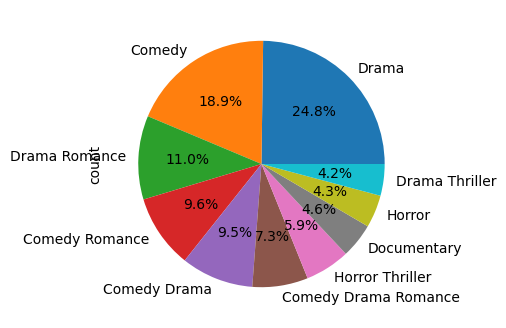

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(9,4))
df['genres'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%',color=sns.color_palette('Set2'))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

/tmp/ipython-input-74-2304463943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['release_year'] = (df_filtered['release_date']).dt.year


Text(0.5, 1.0, 'Average Budget vs. Revenue Over Time')

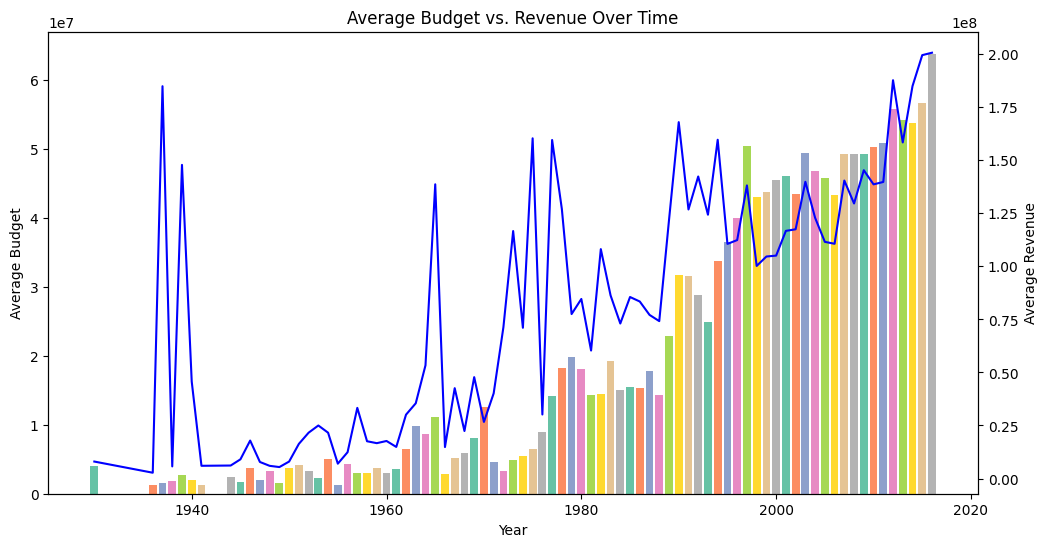

In [ ]:
# Chart - 2 visualisation code
# Filter to avoid noise from 0 or extremely low budgets
df_filtered = df[(df['budget'] > 1e6) & (df['revenue'] > 1e6)]
df_filtered['release_year'] = (df_filtered['release_date']).dt.year

# Group by year
grouped = df_filtered.groupby('release_year').agg({
    'budget': 'mean',
    'revenue': 'mean'
})

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar: Average Budget
ax1.bar(grouped.index, grouped['budget'], color=sns.color_palette('Set2'), label='Average Budget')
ax1.set_ylabel('Average Budget')
ax1.set_xlabel('Year')

# Line: Average Revenue
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['revenue'], color='blue', label='Average Revenue')
ax2.set_ylabel('Average Revenue')

plt.title('Average Budget vs. Revenue Over Time')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Top directors by average rating')

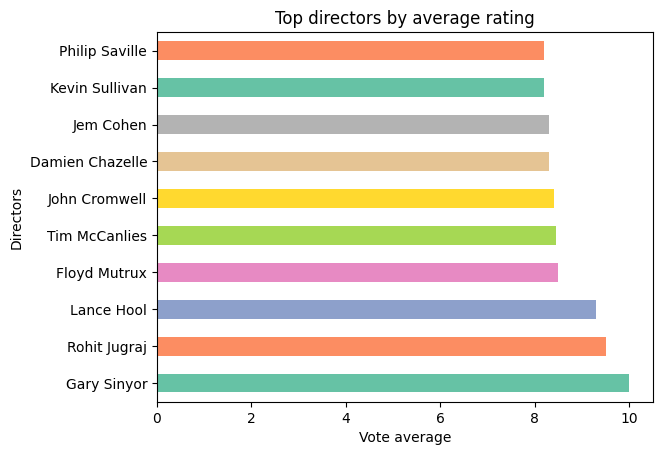

In [ ]:
# # Chart - 3 visualization code
top_directors_ratings = df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)
top_directors_ratings.plot(kind='barh', color=sns.color_palette('Set2'))
plt.ylabel('Directors')
plt.xlabel('Vote average')
plt.title('Top directors by average rating')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

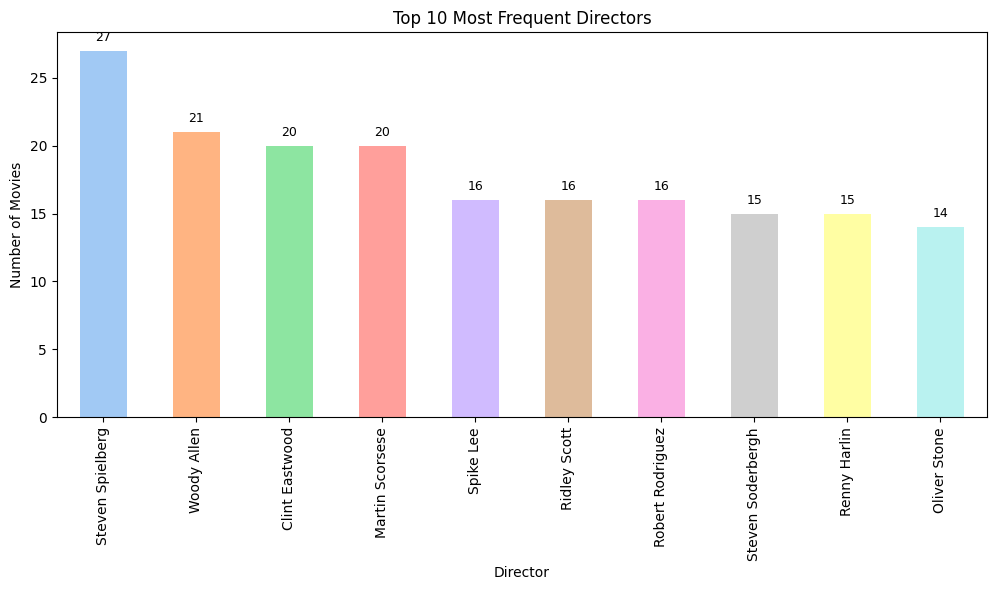

In [ ]:
# Chart - 4 visualization code

# Filter out unknown or blank directors
filtered_df = df[df['director'].notna() &
                 (df['director'].str.strip().str.lower() != 'unknown') &
                 (df['director'].str.strip() != '')]

# Get top 10 directors
top_directors = filtered_df['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 5))
bars = top_directors.plot(kind='bar', color=sns.color_palette('pastel'))

plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Frequent Directors')

# Add value labels on top of bars
for i, v in enumerate(top_directors.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
df['revenue'].head()

,revenue
0,2787965087
1,961000000
2,880674609
3,1084939099
4,284139100


Text(0.5, 1.0, 'Top directors by average revenue')

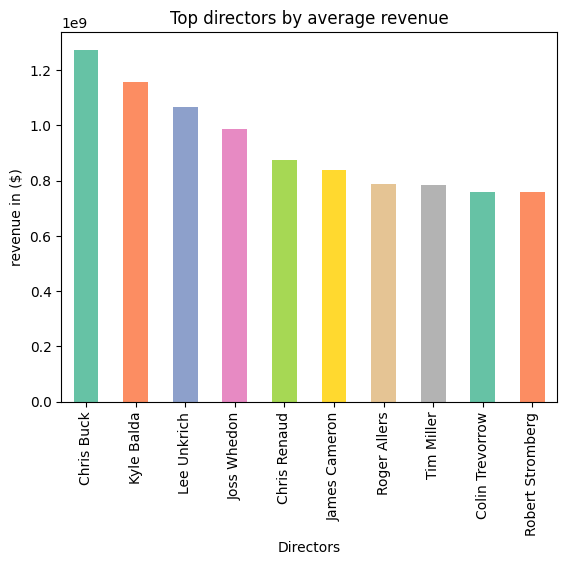

In [ ]:
# Chart - 5 visualization code

top_directors_runtime = df.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)
top_directors_runtime.plot(kind='bar', color=sns.color_palette('Set2'))
plt.xlabel('Directors')
plt.ylabel('revenue in ($)')
plt.title('Top directors by average revenue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Top 10 Most Common Movie Runtimes')

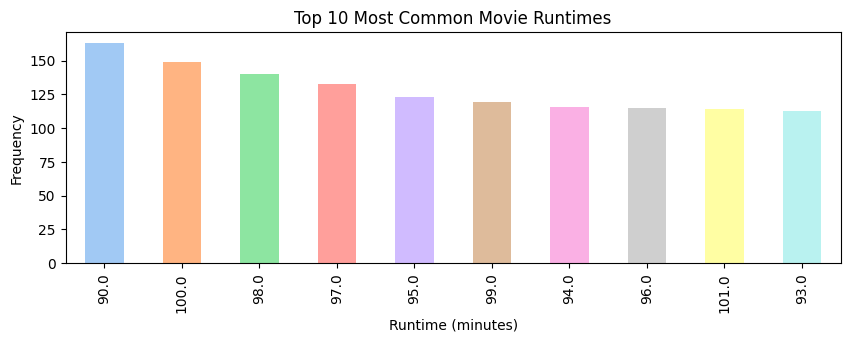

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 3))
df['runtime'].value_counts().head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Movie Runtimes')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

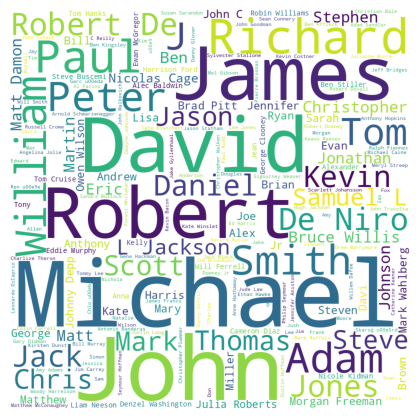

In [ ]:
# Chart - 7 visualization code
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all taglines into a single string
all_taglines = " ".join(df['cast'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(wordcloud.STOPWORDS),
                      min_font_size = 10).generate(all_taglines)

# Plot the word cloud
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

/tmp/ipython-input-35-2279055002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='original_language', y='vote_average', palette='pastel')


Text(0, 0.5, 'Vote Average')

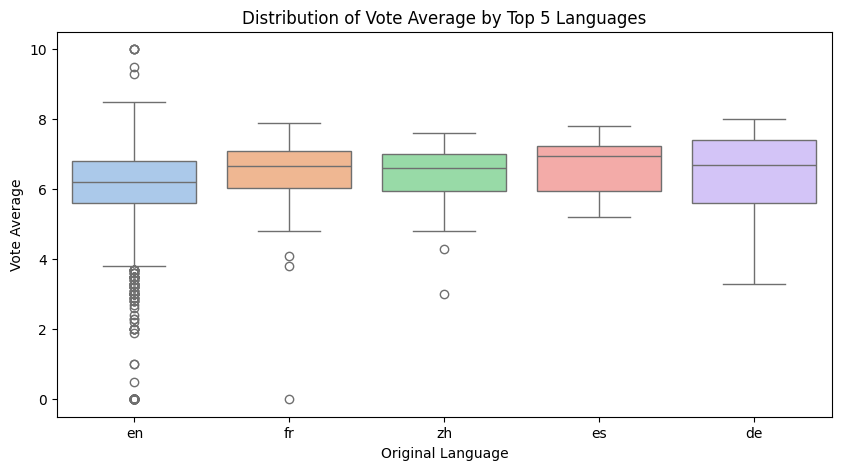

In [ ]:
# Chart - 8 visualization code

# Filter top 5 languages
top_languages = df['original_language'].value_counts().head(5).index
filtered_df = df[df['original_language'].isin(top_languages)]

# Create box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='original_language', y='vote_average', palette='pastel')

plt.title('Distribution of Vote Average by Top 5 Languages')
plt.xlabel('Original Language')
plt.ylabel('Vote Average')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 1.0, 'Vote Average distribution')

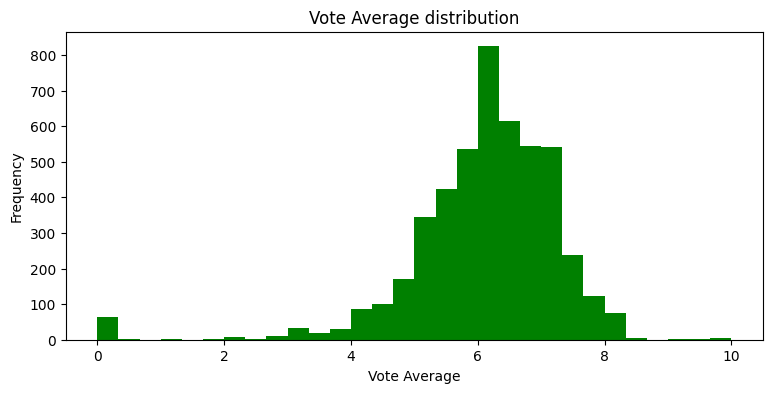

In [ ]:
# Chart - 9 Visualisation code
plt.figure(figsize=(9,4))
df['vote_average'].plot(kind='hist', bins=30, title='Vote Average Distribution',color='green')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Vote Average distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Movie released over time')

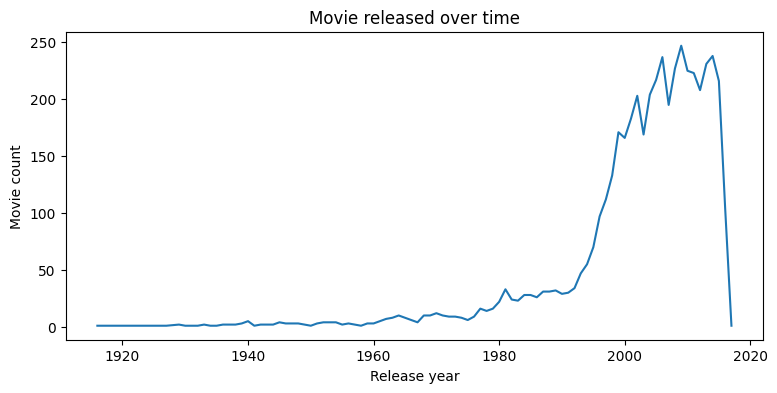

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(9,4))
df['release_year'] = (df['release_date']).dt.year
df['release_year'].value_counts().sort_index().plot(kind='line', title='Movies Released Over Time')
plt.xlabel('Release year')
plt.ylabel('Movie count')
plt.title('Movie released over time')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

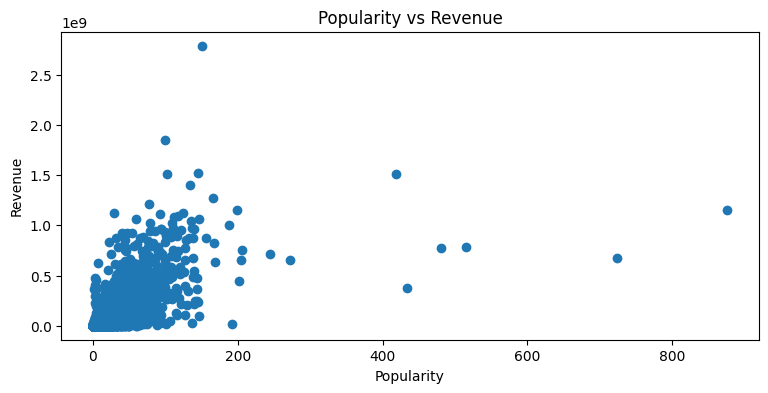

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(9,4))
plt.scatter(df['popularity'], df['revenue'], alpha=1)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 1.0, 'Top languages by value count')

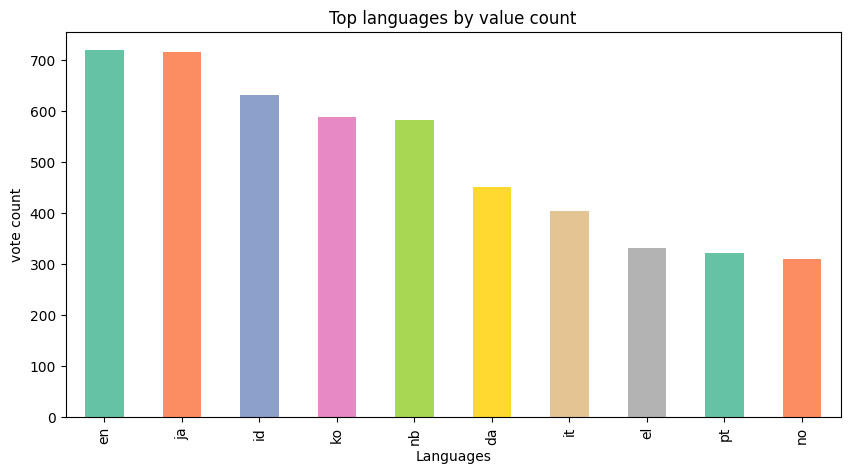

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10,5))
top_countries_runtime = df.groupby('original_language')['vote_count'].mean().sort_values(ascending=False).head(10)
top_countries_runtime.plot(kind='bar', color=sns.color_palette('Set2'))
plt.xlabel('Languages')
plt.ylabel('vote count')
plt.title('Top languages by value count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

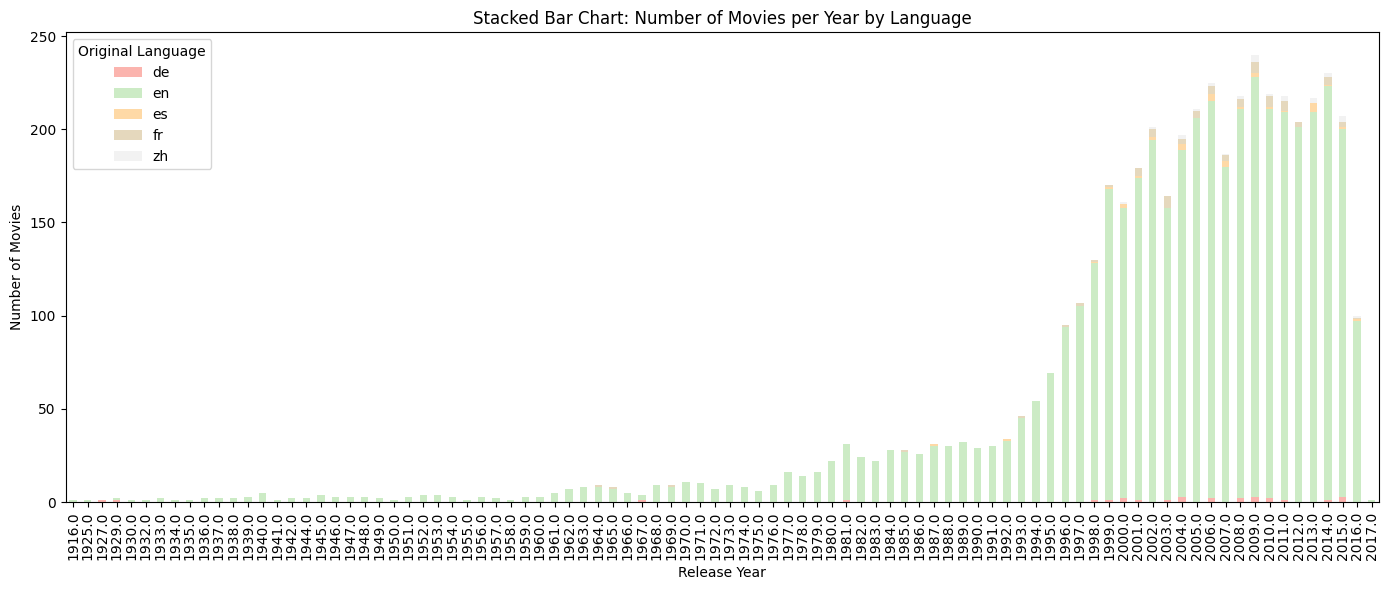

In [ ]:
# Chart - 13 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Convert release date to year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Filter top 5 languages
top_langs = df['original_language'].value_counts().head(5).index
lang_df = df[df['original_language'].isin(top_langs)]

# Group by year and language
stacked = lang_df.groupby(['release_year', 'original_language']).size().unstack(fill_value=0)

# Plot stacked bar chart
stacked.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Pastel1')

plt.title('Stacked Bar Chart: Number of Movies per Year by Language')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Original Language')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

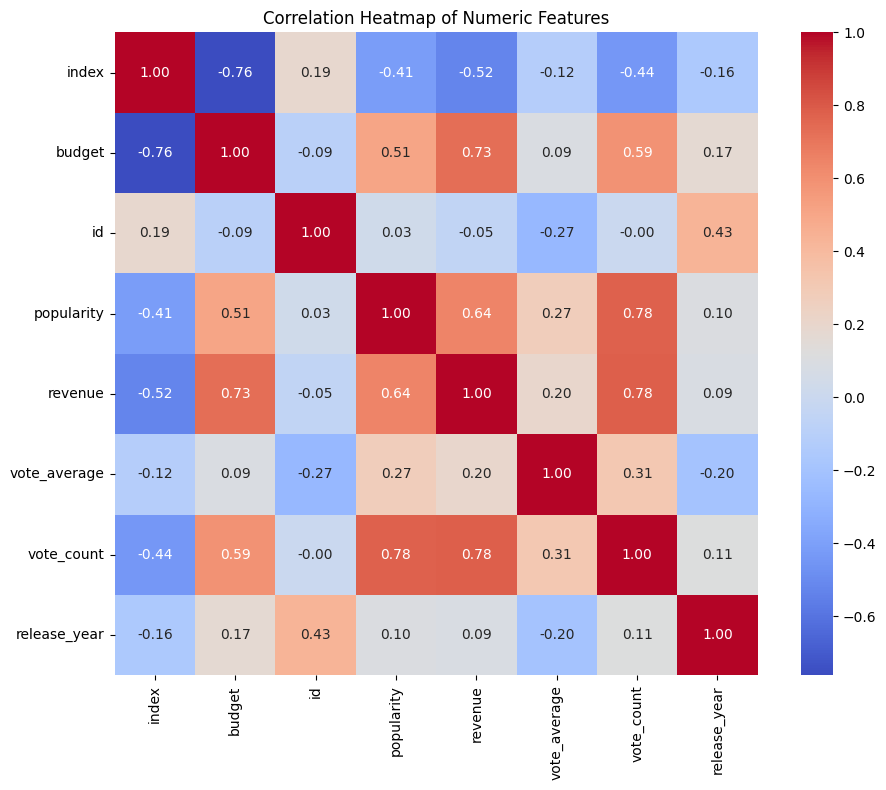

In [ ]:
# Correlation Heatmap visualization code
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

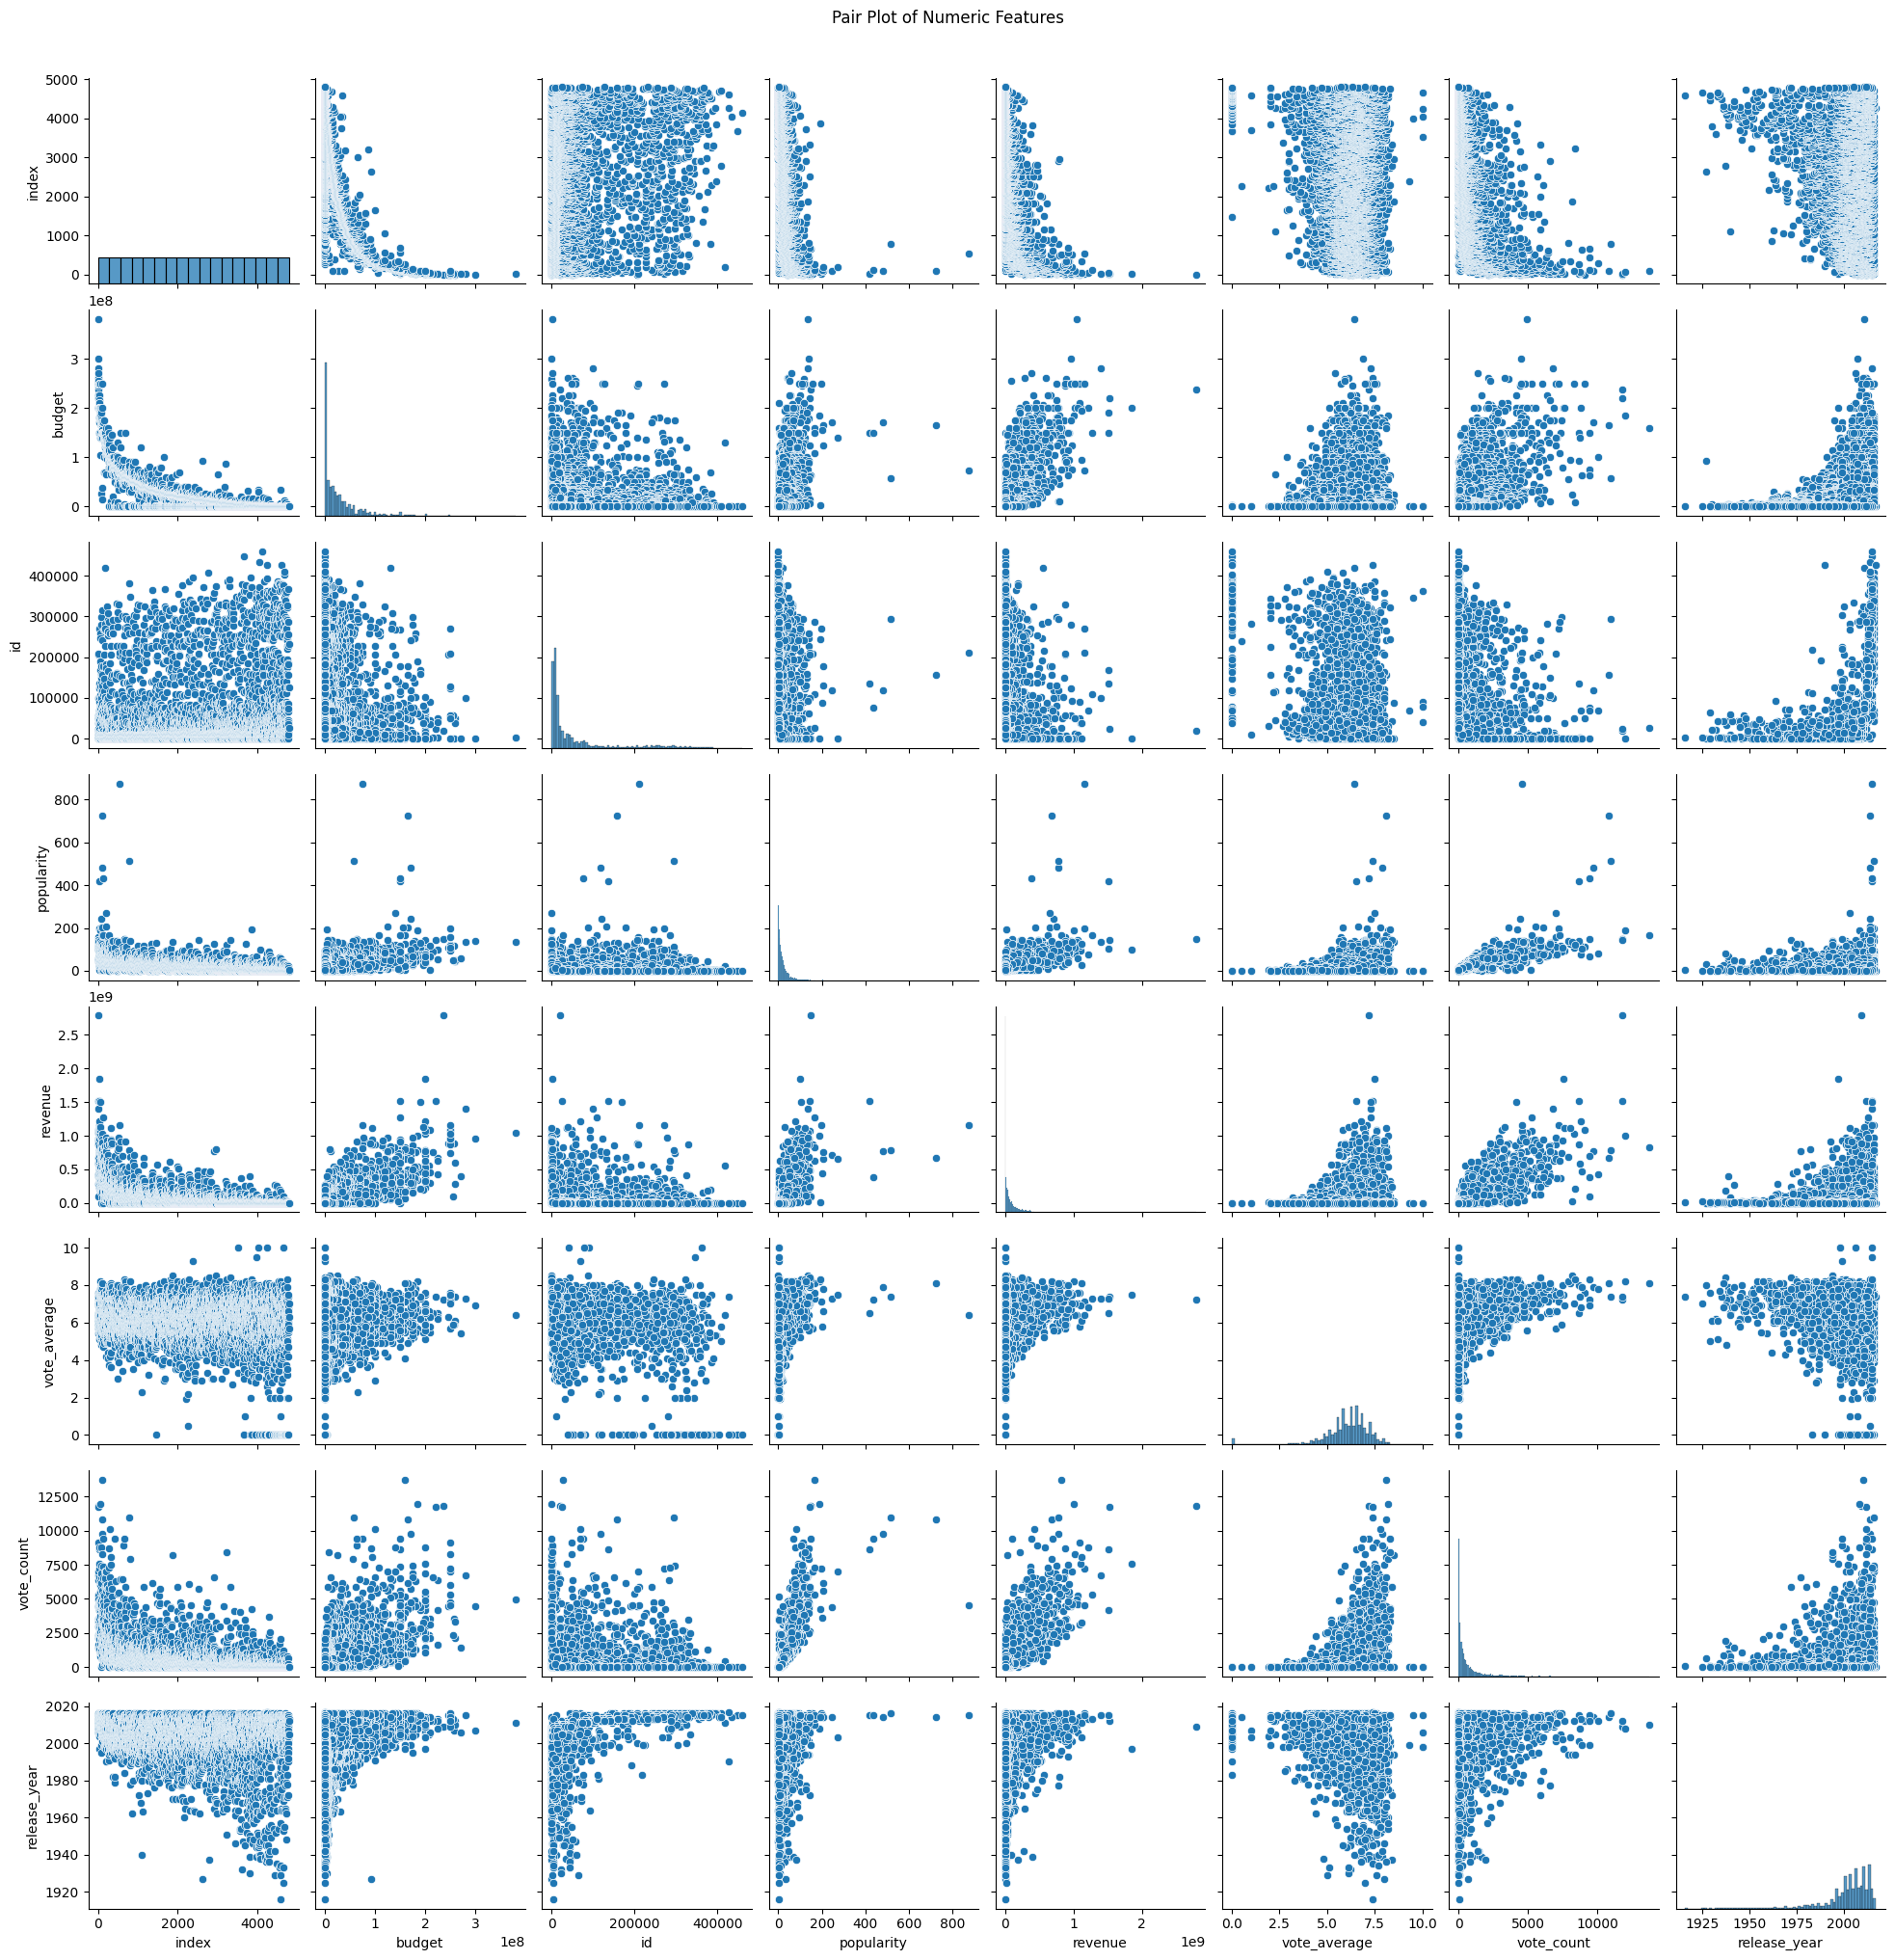

In [ ]:
# Pair Plot visualization code
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# --- Pair Plot ---
sns.pairplot(numeric_cols)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
features = ['genres','keywords','tagline','cast','director']

In [ ]:
for feature in features:
  df[feature] = df[feature].fillna('')

In [ ]:
df['combine'] = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [ ]:
df['combine'].head()

,combine
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

**TF-IDF VECTORIZATION**

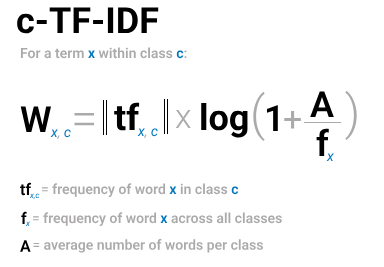

In [ ]:
vector = TfidfVectorizer()
f_vector = vector.fit_transform(df['combine'])
print(f_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [ ]:
f_vector.shape

(4803, 17318)

In [ ]:
similarity = cosine_similarity(f_vector)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
similarity.shape

(4803, 4803)

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Code to find the movie

movie_name = input('Enter your favourite movie name :')
list_of_all_title = df['title'].tolist()
find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
close_match = find_close_match[0]
index_of_movie = df[df.title == close_match]['index'].values[0]
similar_score = list(enumerate(similarity[index_of_movie]))
similar_score_sort = sorted(similar_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')
for i in range(30):
  index = similar_score_sort[i][0]
  print(df['title'][index])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

ML MODEL - Content based filtering based on cosine similarity.

It includes feature extraction, Vectorization, Similarity using cosine formula.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**


In conclusion, this content-based movie recommendation system effectively identifies and suggests movies that are similar in content to a given title. By analysing key features such as plot, genres, cast, keywords, and director, and processing them into a structured text format, the system can measure similarity using TF-IDF vectorization and cosine similarity. This approach ensures that recommendations are based on meaningful content relationships rather than user behaviour or ratings.

While the system provides accurate and relevant suggestions, its lack of personalization limits its effectiveness for individual users. Enhancing the model with user interaction data or combining it with collaborative filtering techniques could significantly improve its accuracy and user satisfaction.

Overall, this project showcases how natural language processing and machine learning can be applied to build a functional and scalable recommendation system based purely on content features.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***